## Croma-Key simples


In [1]:
#Bibliotecas
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lendo a Imagem;
im = cv2.imread('../Imagens/croma.jpg')

# Convertendo para RGB;
im_front = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [3]:
# Comprimento
width = im.shape[1]
# Altura
height = im.shape[0]
# Dimesões
dim = (width ,height)

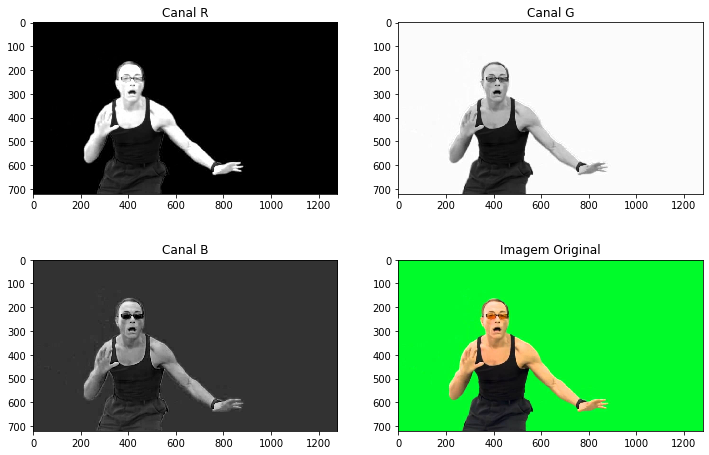

In [4]:
# Separando os canais da imagem em R, G, B
im_b,im_g,im_r = cv2.split(im)

# Configuração de tamnho de plot
plt.figure(figsize=(12,8))
# Plot de R, B, G e imagem oriinal.
plt.subplot(221), plt.imshow(im_r, cmap ='gray');
plt.title('Canal R');
plt.subplot(222), plt.imshow(im_g, cmap ='gray');
plt.title('Canal G')
plt.subplot(223), plt.imshow(im_b, cmap ='gray');
plt.title('Canal B')
plt.subplot(224), plt.imshow(im_front);
plt.title('Imagem Original');

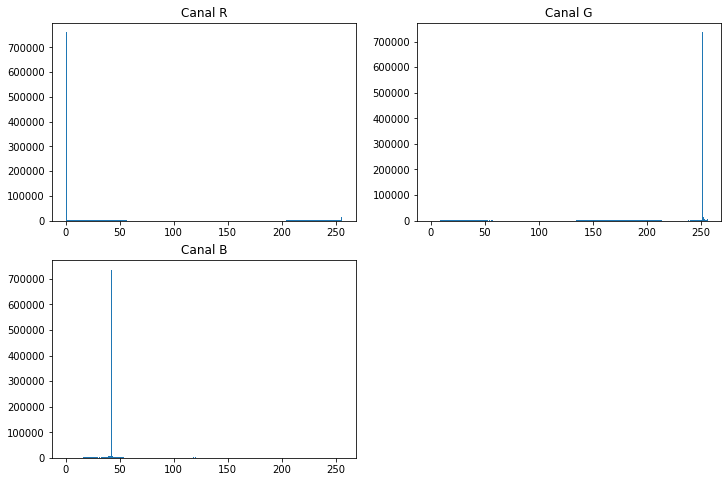

In [5]:
# Configuração de tamnho de plot
plt.figure(figsize=(12,8))

# Histograma das imagens R, G, B.
# Com o histograma é possivel ver a distribuição de cores nos canais
plt.xlim([0,260])
plt.subplot(2,2,1), plt.hist(im_r.ravel(), 256,[0, 256]);
plt.title('Canal R');
plt.subplot(2,2,2), plt.hist(im_g.ravel(), 256,[0, 256]);
plt.title('Canal G');
plt.subplot(2,2,3), plt.hist(im_b.ravel(), 256,[0, 256]);
plt.title('Canal B');

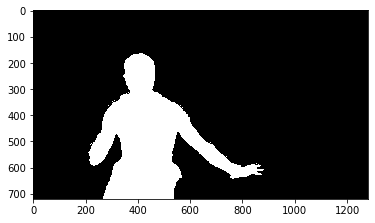

In [6]:
# Thresholder da imagem Green(G) e inversão da imagem com 'cv2.THRESH_BINARY_INV'
ret,im_thresh1 = cv2.threshold(im_g,235,255,cv2.THRESH_BINARY_INV)
# Plot imagem resutante
plt.imshow(im_thresh1, 'gray');

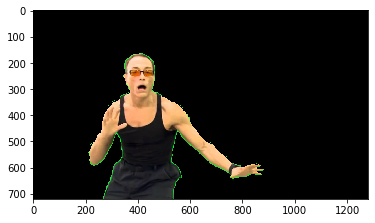

In [7]:
#convetendo para RGB
Im_RGB = cv2.cvtColor(im_thresh1,cv2.COLOR_GRAY2BGR)

#Faço uma AND com a imagem original com o thresholder convertido para RGB.
im_noback = cv2.bitwise_and(Im_RGB, im)

#converto para RGB o resultado e mostro a imagem resultante.
im_noback = cv2.cvtColor(im_noback,cv2.COLOR_BGR2RGB)
plt.imshow(im_noback);

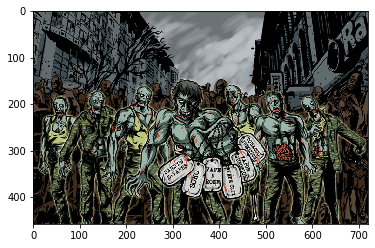

In [8]:
# Lendo Imagem que será o plano de fundo.
z = cv2.imread('../Imagens/z.jpg')

# Convertendo para RGB a imagem.
z = cv2.cvtColor(z,cv2.COLOR_BGR2RGB)

# Plotando a imagem de backround e redimencionando a imagem de back.
plt.imshow(z);
im_res = cv2.resize(z, dim, interpolation = cv2.INTER_AREA)

In [9]:
im_res.shape

(720, 1280, 3)

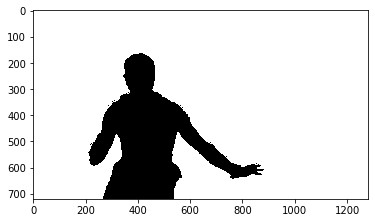

In [13]:
# Invete a imagem do thrashholder
im_iv = 255 - Im_RGB

# Plot image
plt.imshow(im_iv);

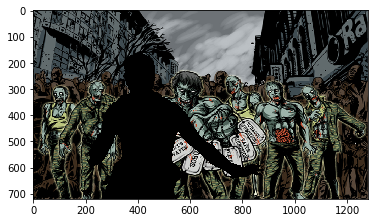

In [14]:
im_z_nofront = cv2.bitwise_and(im_res, im_iv)
plt.imshow(im_z_nofront);

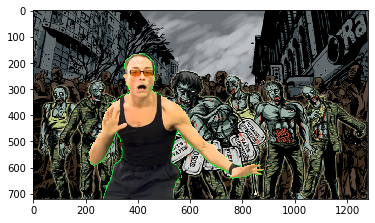

In [15]:
# Soma da background com o frontend
im_final = im_z_nofront + im_noback
plt.imshow(im_final);

# **Fim**